# Benhcmark model tutor

In [46]:
import sys
sys.path.append('..')
sys.path.append('../src')


import warnings
warnings.filterwarnings('ignore')

import datetime
import time
import random
import string
import os
import json
import random
import string
from pprint import pformat
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
# logging.debug("test")
# logging.basicConfig(filename='./temp_tutor.log', level=logging.INFO)



# --- Dependencies
import pygmo as pg
import numpy as np
import pandas as pd
import plotly.express as px

from src.hypothesis.custom_gp_kernel import KERNEL_MAUNA, KERNEL_SIMPLE, KERNEL_GPML
from src.ploting import plot_mo

def make_nd_pop(pro, x,y):
    nd_front = pg.fast_non_dominated_sorting(y)[0][0]
    nd_x = x[nd_front]
    nd_y = y[nd_front]
    t_pop = pg.population(pro)
    for i, p_vector in enumerate(nd_x):
        t_pop.push_back(x=p_vector, f=nd_y[i])
    return t_pop
import re
import ast
def str2array(s):
    # Remove space after [
    s=re.sub('\[ +', '[', s.strip())
    # Replace commas and spaces
    s=re.sub('[,\s]+', ', ', s)
    return np.array(ast.literal_eval(s))

## Final results after 1000 function evaluations

In [119]:
tut_data = pd.read_csv("./data/tutor model/hypervolume v2/mtutor_on_wfg_i0.mcxfoy37r2.csv")
hypermapper_data = pd.read_csv("./data/hypermapper/WFG4_nbyvnp5_output_samples.csv")

In [3]:
# fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
# df = pd.DataFrame({
#     'x':[1,2,3,4],
#     'y':[5,6,7,8],})
# fig2 = px.bar(df, x="x", y="y")
# fig.add_trace(fig2.data[0])
# fig.show()

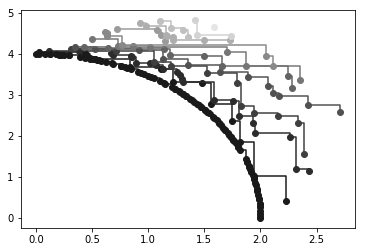

In [248]:
DIM = 2
ID = 4
OBJ = 2

# --- Problem
udp = pg.wfg(prob_id=ID, dim_dvs=DIM, dim_obj=OBJ, dim_k=OBJ-1)
# udp = pg.zdt(prob_id=ID, param=DIM)
pro = pg.problem(udp)

pop = pg.population(pro, size=100)
algo2 = pg.algorithm(pg.nsga2(gen=1))
# algo1 = pg.algorithm(pg.moead(gen=1000))
# pop = algo1.evolve(pop) 
pg.plot_non_dominated_fronts(pop.get_f())
for _ in range(400):
    pop = algo2.evolve(pop) 
    
pg.plot_non_dominated_fronts(pop.get_f())

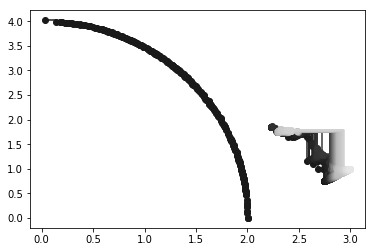

In [127]:
pg.plot_non_dominated_fronts(hypermapper_data[['f1','f2']].values.tolist()) 
stat = tut_data[3:].pop_ndf_f.values.tolist()[0]
pg.plot_non_dominated_fronts(str2array(stat))  

In [128]:
DIM = 2
ID = 4
OBJ = 2

# --- Problem
udp = pg.wfg(prob_id=ID, dim_dvs=DIM, dim_obj=OBJ, dim_k=OBJ-1)
# udp = pg.zdt(prob_id=ID, param=DIM)
pro = pg.problem(udp)

pop = pg.population(pro, size=100)
# algo1 = pg.algorithm(pg.moead(gen=1000))
# pop = algo1.evolve(pop) 
algo2 = pg.algorithm(pg.nsga2(gen=1000))
pop = algo2.evolve(pop) 

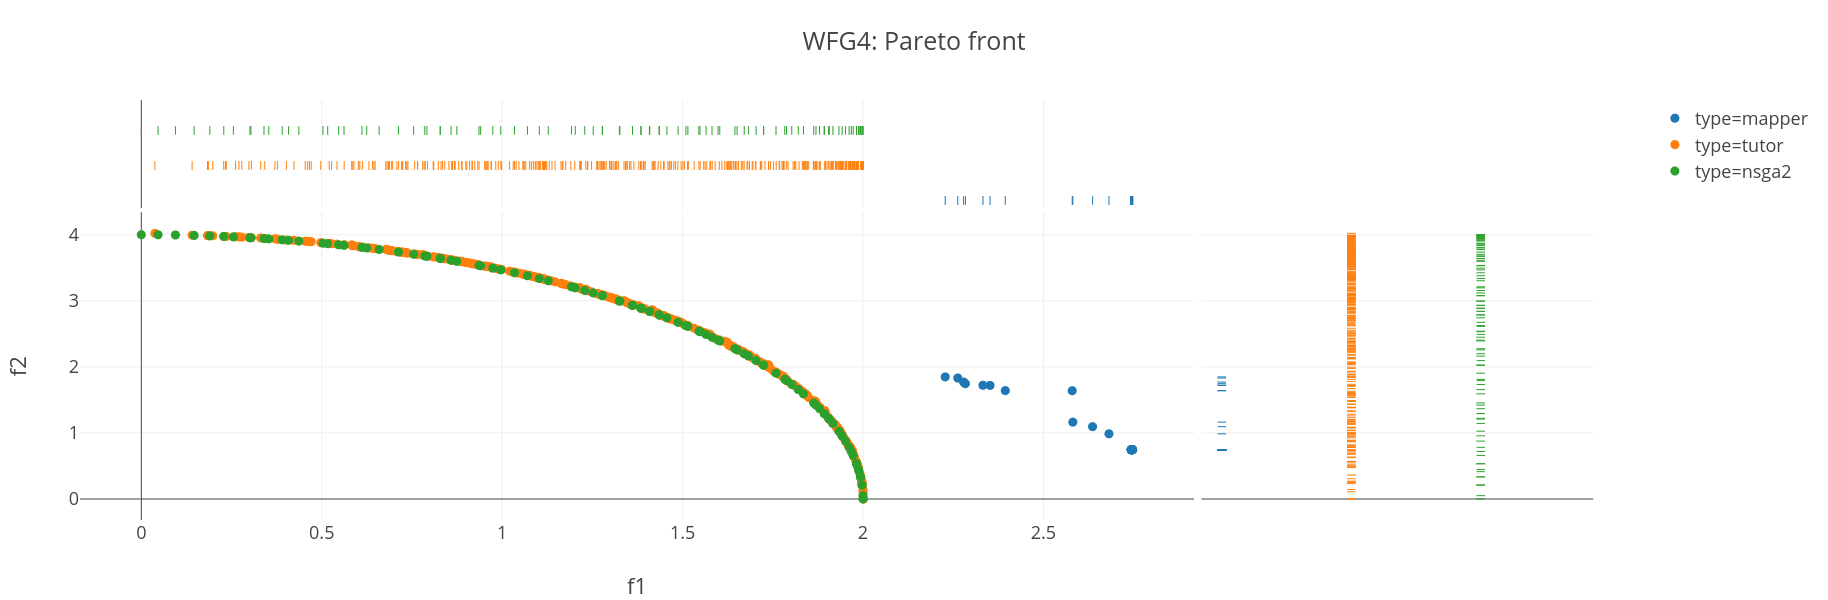

In [129]:
ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(hypermapper_data[['f1', 'f2']].values.tolist())
# df = hypermapper_data.copy()
# df['ndf'] = 0
# df.loc[ndf[0],['ndf']] = 1

# mapper
mapper_front = hypermapper_data.iloc[ndf[0]][['f1', 'f2']]
mapper_front['type'] = 'mapper'

# tutor
tut_front = pd.DataFrame(str2array(tut_data[3:].pop_ndf_f.values.tolist()[0]), columns=['f1', 'f2'])
tut_front['type'] = 'tutor'

# nsga2
nsga2_front = pd.DataFrame(pop.get_f().tolist(), columns=['f1', 'f2'])
nsga2_front['type'] = 'nsga2'

df = pd.concat([mapper_front,tut_front, nsga2_front])

px.scatter(df, x="f1", y="f2", template="presentation", color="type", marginal_y="rug", marginal_x="rug", title="WFG4: Pareto front")

## Iterations

In [130]:
tut_data

,problem_name,seed,problem_id,objectives,feature_dim,pred_count,eval_budget,surr_portfolio,pop_ndf_x,pop_ndf_f,fevals,evolve_time,date,p_distance,hypervolume,ndf_space,ndf_size,error,final
0,wfg,42,1,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[0.012305823416113106, 1.3999999962475198], [...","[[2.3717705943704726, 1.0491812123856634], [2....",1000.0,27788.161000,2020-03-06 21:11,NaN,0.670157,0.087034,34.0,NaN,True
1,wfg,42,2,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Init problem: \nfunction: wfg\nwhere: /home/co...,False
2,wfg,42,3,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Init problem: \nfunction: wfg\nwhere: /home/co...,False
3,wfg,42,4,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[1.9221152601340006, 1.3530815230057471], [0....","[[1.9526840175125304, 0.8822524813686861], [1....",1000.0,30492.452778,2020-03-07 05:39,NaN,1.726885,0.007964,332.0,NaN,True
4,wfg,42,5,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[0.8437529668790117, 2.2190132787489504e-08],...","[[2.0235003429354097, 0.6989883232744872], [1....",1000.0,34631.890623,2020-03-07 15:16,NaN,1.687746,0.002989,897.0,NaN,True
5,wfg,42,6,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[1.2353572392596894, 1.3951616383722052], [0....","[[1.6535069537123404, 2.2638380285291118], [1....",1000.0,33929.452835,2020-03-08 00:42,NaN,1.697989,0.005207,515.0,NaN,True
6,wfg,42,7,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[1.0360214860421657, 1.3973270032998444], [1....","[[1.6719140091581925, 2.202894713388568], [1.6...",1000.0,31451.393757,2020-03-08 09:26,NaN,1.699126,0.004827,403.0,NaN,True
7,wfg,42,8,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[1.3458603258796922, 3.7734113036523698], [1....","[[1.7435503866203093, 1.9675664654433742], [1....",1000.0,34700.186158,2020-03-08 19:04,NaN,1.665321,0.035858,224.0,NaN,True
8,wfg,42,9,2,2,10,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[0.75, 1.5], [0.375, 1.25], [1.125, 1.75], [1...","[[1.923798315919768, 1.1484715812944213], [2.0...",1000.0,36987.667442,2020-03-09 05:21,NaN,1.756865,0.019428,162.0,NaN,True
9,wfg,42,1,2,2,25,1000,"[GaussianProcessRegressor(alpha=1e-10, copy_X_...","[[0.000130471935870748, 1.3999999711664848], [...","[[2.158982991158812, 1.4931995234812647], [2.1...",1000.0,12624.143462,2020-03-09 08:51,NaN,0.507096,0.055704,32.0,NaN,True


In [193]:
ZDT4_2_tutor_loop = pd.read_csv('./data/tutor model/hypervolume v2/WFG6_2_tutor_loop.140123916276944v2.csv')
ZDT4_2_tutor_loop['iteration'] = ZDT4_2_tutor_loop['iteration']*10
# ZDT4_2_tutor_loop.rename(columns={'iteration': 'f_eval'}, inplace=True)
ZDT4_2_tutor_loop


,model name,prediction,iteration,problem,objectives,feature_dim,ref_point,hypervolume,ndf_size,ndf_space,...,test_neg_mean_squared_error,test_neg_mean_absolute_error,y_index,params hash,id,surr_score,ndf_surr_score,solver,prediction_score,tutor_id
0,sampling plan,"[[1.0, 2.0], [1.5, 1.0], [0.5, 3.0], [0.75, 1....",10,WFG6,2,2,[2.81179802 3.9349042 ],2.157137,6,0.246954,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140123916276944
1,sampling plan,"[[0.875, 2.25], [0.625, 0.75], [1.625, 2.75], ...",20,WFG6,2,2,[2.81179802 4.13939835],2.990268,8,0.109489,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,140123916276944
2,gaussianprocessregressor,[[9.24165643e-01 1.47576306e+00]\n [1.64430500...,30,WFG6,2,2,[2.01834901 4.06748571],1.366373,12,0.128133,...,-0.001613,-0.028708,all,74fc,5ed95e,0.997922,0.997922,"{'estimator': None, 'gen': 100, 'pop_size': 10...",2.542273,140123916276944
3,gaussianprocessregressor,[[1.23535724 1.39516164]\n [1.68092784 1.41307...,40,WFG6,2,2,[2.01834901 4.06748571],1.588732,17,0.092586,...,-0.005571,-0.039132,all,74fc,5ed95e,0.995597,0.994769,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.734908,140123916276944
4,gaussianprocessregressor,[[0.19685443 1.56606407]\n [0.29238873 1.46379...,50,WFG6,2,2,[2.02361689 4.06748571],1.684675,27,0.042184,...,-0.001156,-0.017559,all,74fc,5ed95e,0.986336,0.998885,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.805668,140123916276944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,gaussianprocessregressor,[[0.7727095 1.40237361]\n [1.0149914 1.40262...,960,WFG6,2,2,[2.0003165 4.00016802],1.696879,502,0.005369,...,-0.000129,-0.002439,all,74fc,5ed95e,0.999711,0.999998,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.678574,140123916276944
96,gaussianprocessregressor,[[0.15622356 1.40429104]\n [1.51916045 1.40426...,970,WFG6,2,2,[2.0003165 4.00016802],1.697056,504,0.005366,...,-0.000176,-0.002751,all,74fc,5ed95e,0.999757,0.999998,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.678636,140123916276944
97,gaussianprocessregressor,[[0.50694926 1.40403997]\n [0.73269726 1.40068...,980,WFG6,2,2,[2.0003165 4.00016802],1.697364,507,0.005328,...,-0.000280,-0.003799,all,74fc,5ed95e,0.999925,0.999998,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.680252,140123916276944
98,gaussianprocessregressor,[[1.79740823 1.40196396]\n [0.14495295 1.40386...,990,WFG6,2,2,[2.0003165 4.00016802],1.697664,511,0.005281,...,-0.000467,-0.004130,all,74fc,5ed95e,0.999229,0.999998,"{'estimator': None, 'gen': 100, 'pop_size': 10...",1.680004,140123916276944


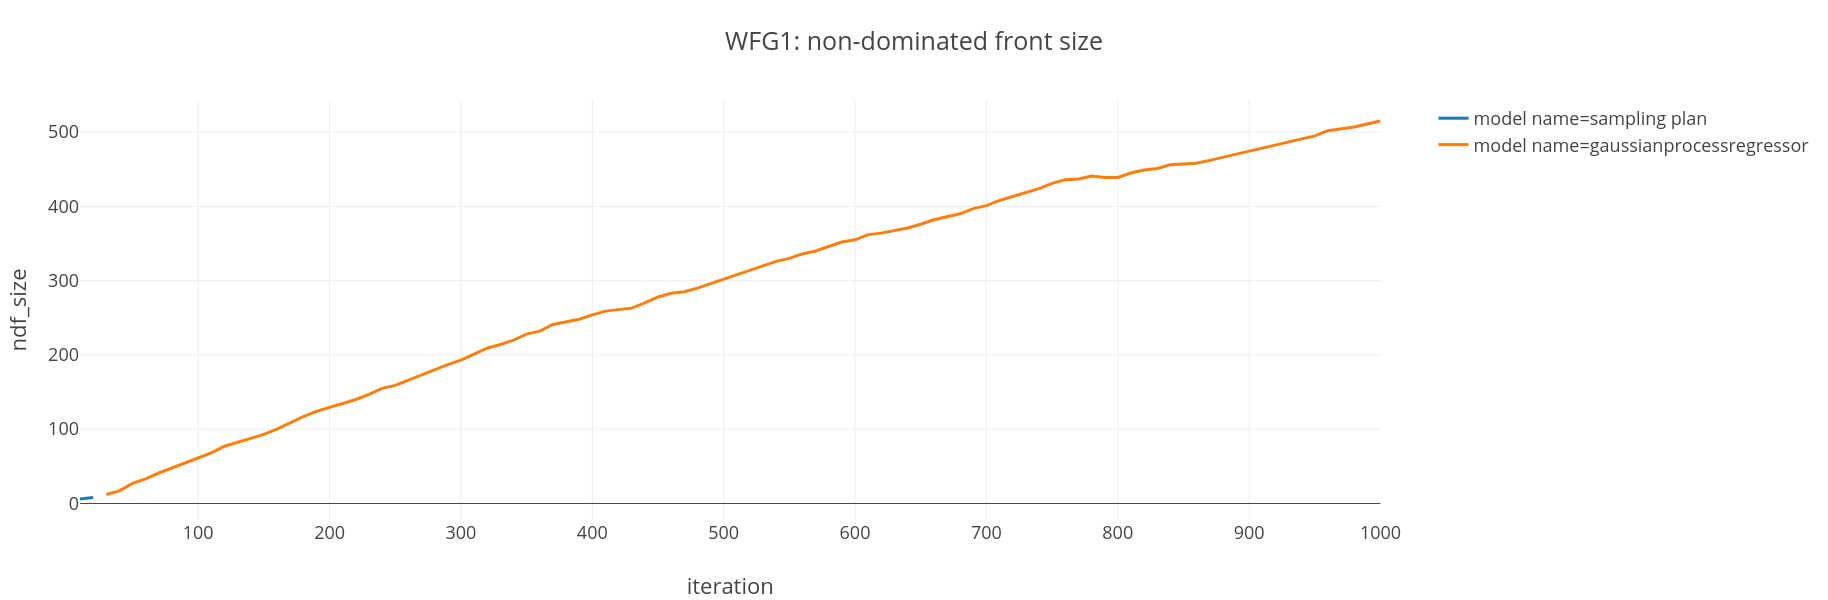

In [194]:
px.line(ZDT4_2_tutor_loop, x="iteration", y="ndf_size", color="model name", render_mode="svg", template="presentation", title="WFG1: non-dominated front size ")

In [195]:
hypermapper = pd.read_csv("./data/hypermapper/WFG6_0qetocf_output_samples.csv").reset_index(level=0)
hypermapper.rename(columns={'index': 'iteration'}, inplace=True)
hypermapper['model name'] = 'hypermapper'
def get_ndf_size(pop_f):
    if len(pop_f)<2:
        return 0
    ndf, dl, dc, ndr = pg.fast_non_dominated_sorting(pop_f)
    return len(ndf[0])

obj = [i.tolist() for i in hypermapper[['f1', 'f2']].values]
hypermapper["ndf_size"] = [get_ndf_size(obj[:i+1]) for i in range(len(hypermapper))]
hypermapper

,iteration,f1,x2,f2,Timestamp,x1,model name,ndf_size
0,0,2.572206,0.017238,3.428426,6,1.164381,hypermapper,0
1,1,0.334577,1.894979,4.179966,6,0.091880,hypermapper,2
2,2,1.813806,2.169921,2.901224,6,1.096937,hypermapper,2
3,3,1.733614,2.325679,3.255867,6,0.967434,hypermapper,3
4,4,2.523573,2.816486,1.126069,6,1.814320,hypermapper,4
...,...,...,...,...,...,...,...,...
995,995,0.011684,1.408312,4.003161,6156516,0.005403,hypermapper,16
996,996,0.019888,1.415617,4.005910,6163025,0.008837,hypermapper,16
997,997,2.019953,1.451879,0.019953,6169575,2.000000,hypermapper,16
998,998,0.026603,1.449300,4.018932,6176145,0.004865,hypermapper,16


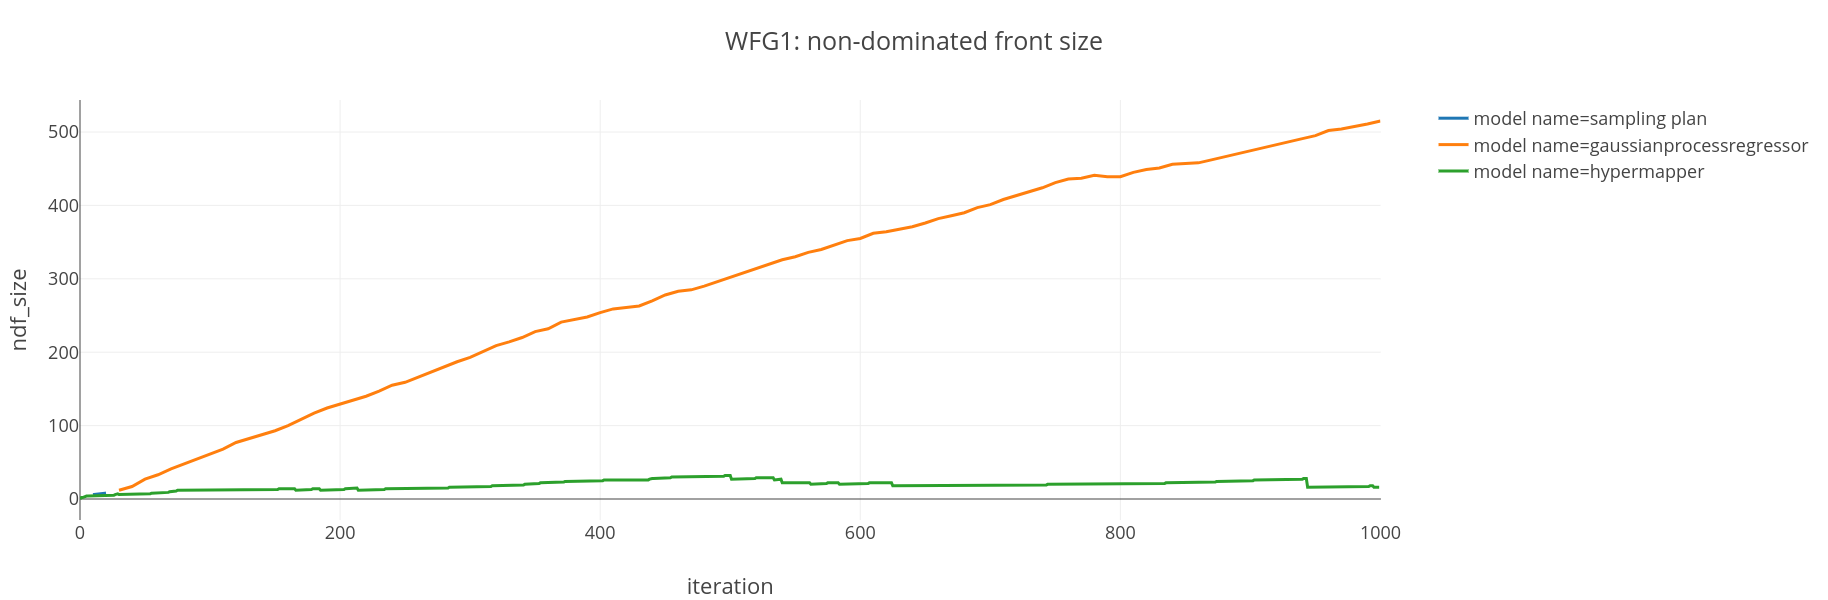

In [196]:
# px.line(df, x="index", y="ndf_size", render_mode="svg", template="presentation", title="ZDT4: non-dominated front size ")



df = pd.concat([ZDT4_2_tutor_loop[['iteration', 'ndf_size', "model name"]], hypermapper[['iteration', 'ndf_size', "model name"]]])
df
px.line(df, x="iteration", y="ndf_size", color="model name", render_mode="svg", template="presentation", title="WFG1: non-dominated front size ")

In [199]:
pd.read_csv('./data/tutor model/static_sampling/ZDT4_2_plan_tutor_loop.139842828434576.csv').prediction[2]

'[[3.70073102e-01 6.26434179e-01]\n [3.70073102e-01 6.26434179e-01]\n [3.71755774e-08 1.14998981e+00]\n [3.53353527e-01 4.21221221e-01]\n [1.00108180e-02 1.14999382e+00]\n [1.59542923e-01 9.58316335e-01]\n [1.00087793e-02 1.40010195e+00]\n [3.71755774e-08 1.14998981e+00]\n [3.53353527e-01 6.26238246e-01]\n [1.59542923e-01 8.35938155e-01]\n [1.00108180e-02 1.14999382e+00]\n [1.00087793e-02 1.40010195e+00]\n [1.60857274e-02 1.40010191e+00]\n [1.60857075e-02 6.26296202e-01]\n [1.00108180e-02 1.14999382e+00]\n [3.71755774e-08 1.14998981e+00]\n [1.64557276e-01 1.14998452e+00]\n [1.60857270e-02 1.14998981e+00]\n [1.60857274e-02 1.40010191e+00]\n [1.59542923e-01 9.58316335e-01]\n [3.70073102e-01 6.26434179e-01]\n [1.60857075e-02 6.26296202e-01]\n [1.00108180e-02 1.14999382e+00]\n [1.59542923e-01 8.18518838e-01]\n [1.59542924e-01 1.14998981e+00]]'

In [228]:
df = pd.DataFrame([[pop.get_f().tolist(), "d"], [pop.get_x().tolist(), "a"]], columns=['a', 'b'])

df.to_pickle('./test.pkl')

In [246]:
temp_f = pd.DataFrame(pop.get_f()).add_prefix('f_')
temp_x = pd.DataFrame(pop.get_x()).add_prefix('x_')

pops = pd.DataFrame()
for _ in range(3):
    temp = pd.concat([temp_x, temp_f], axis=1)
    temp['gen'] = _+1
    pops = pd.concat([pops,temp])
    
    
pops

,x_0,x_1,f_0,f_1,gen
0,6.999948e-01,1.4,2.675878e-07,4.000000e+00,1
1,7.670382e-09,1.4,2.000000e+00,1.147498e-07,1
2,1.479794e+00,1.4,1.192052e+00,3.211861e+00,1
3,1.557144e+00,1.4,1.127740e+00,3.303454e+00,1
4,1.801654e-01,1.4,1.602972e+00,2.392053e+00,1
...,...,...,...,...,...
95,3.042628e-01,1.4,1.034054e+00,3.423876e+00,3
96,1.377145e+00,1.4,7.545638e-01,3.704394e+00,3
97,2.114013e-01,1.4,1.435206e+00,2.785810e+00,3
98,2.239880e-02,1.4,1.992961e+00,3.352981e-01,3


In [270]:
pd.read_csv('../src/benchmark_results/model_tutor_on_zdt_2.15r5j.csv')

,problem_name,seed,problem_id,objectives,feature_dim,surr_portfolio,eval_budget,pred_count,start_set_%,solver,...,pop_ndf_f,fevals,evolve_time,date,p_distance,hypervolume,ndf_space,ndf_size,error,final
0,zdt,42,4,2,2,"[ModelsUnion(models=[SVR(C=100, cache_size=200...",1000,100,0,moea_control,...,"[[0.5, 0.2928932188134524], [0.23046875, 0.757...",1000,162.790231,2020-03-13 00:14,0.420267,39.949129,0.240492,36,NaN,True
1,zdt,42,6,2,2,"[ModelsUnion(models=[SVR(C=100, cache_size=200...",1000,100,0,moea_control,...,"[[0.28077531904265074, 8.020604781549606], [0....",1000,195.319116,2020-03-13 00:17,0.127762,6.714556,0.086599,156,NaN,True


In [274]:
import random
random.randint(1, 1000)

131